# **Stock Price Prediction using KNN**

**Abstract:**

Stock price prediction remains a critical challenge in financial markets due to its inherent complexity and the multitude of factors influencing market dynamics. Machine learning techniques offer promising avenues for modeling and forecasting stock prices, with the k-nearest neighbors (KNN) algorithm emerging as a popular choice in this domain. This study explores the application of KNN in stock price prediction, leveraging historical price data and relevant features to make informed predictions about future price movements. Through empirical analysis and evaluation, we assess the efficacy and performance of KNN-based models in capturing the intricate patterns inherent in stock price fluctuations. By shedding light on the capabilities and limitations of KNN in stock price prediction, this research aims to contribute to the ongoing discourse surrounding the application of machine learning in financial forecasting.

**Introduction:**

The prediction of stock prices has long been a focal point of research and speculation in financial markets. Investors, traders, and financial analysts seek to anticipate future price movements to make informed decisions and mitigate risks. However, the dynamic and stochastic nature of financial markets renders stock price prediction a formidable challenge, fraught with uncertainty and volatility.

In recent years, machine learning algorithms have gained prominence as valuable tools for modeling and forecasting stock prices. Among these algorithms, the k-nearest neighbors (KNN) algorithm stands out for its simplicity and intuitive appeal. KNN operates on the principle of proximity, wherein it predicts the target variable based on the characteristics of its nearest neighbors in the feature space.

This study explores the application of KNN in stock price prediction, aiming to harness the algorithm's ability to capture complex patterns and relationships in financial data. By leveraging historical price data, along with relevant features such as trading volume, technical indicators, and market sentiment, KNN-based models seek to uncover underlying trends and tendencies in stock price movements.

The appeal of KNN lies in its non-parametric nature and flexibility, allowing it to adapt to diverse data distributions and patterns. However, the effectiveness of KNN in stock price prediction hinges on various factors, including feature selection, model hyperparameters, and the choice of distance metric.

Through empirical analysis and evaluation using real-world stock market data, we aim to elucidate the strengths and limitations of KNN-based models in stock price prediction. By comparing KNN with other machine learning techniques and traditional forecasting methods, we seek to provide insights into its performance characteristics and applicability in practical investment scenarios. Ultimately, the goal is to advance our understanding of machine learning-based approaches to stock price prediction and empower market participants with enhanced tools for decision-making and risk management.

### **Data Collection and Preprocessing**

**Step 1:** Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Step 2:** Install quandl ( It is a website which is used to find the historical data of stocks. We will be focusing on TATAGlobal Stocks)

In [ ]:
import quandl
quandl.ApiConfig.api_key="Myinquy7yqtq5WMy43iv"

stock_symbol ="NSE/TATAGLOBAL"
start_date = "2020-01-01"
end_date = "2024-01-01"

In [ ]:
data = quandl.get(stock_symbol, start_date=start_date, end_date=end_date)


**Step 3:** Load the TATAGlobals stocks

In [2]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Step 4:** Print the first 10 and last 10 elements of the dataset

In [4]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
df.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


**Step 5:** Plot the closing price.per year

In [6]:
df['year']=pd.to_datetime(df['Date']).dt.year
closing_price_per_year = df.groupby("year")['Close'].mean()

In [7]:
closing_price_per_year

year
2010    120.151739
2011     95.170040
2012    127.179482
2013    146.155800
2014    153.907172
2015    141.020363
2016    127.547773
2017    181.894556
2018    265.974595
Name: Close, dtype: float64

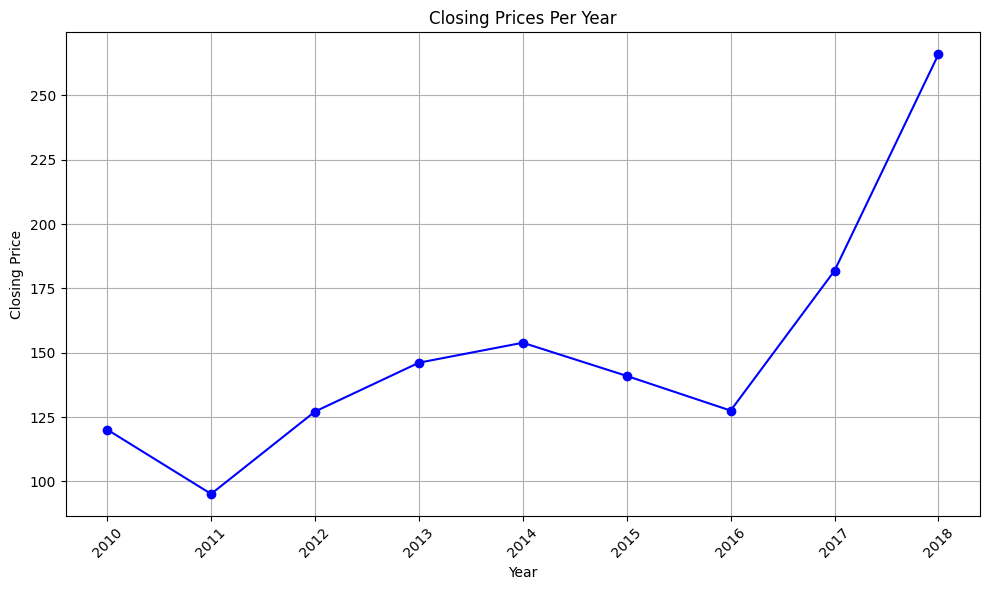

In [9]:
plt.figure(figsize=(10,6))
plt.plot(closing_price_per_year.index, closing_price_per_year.values, marker='o', color='b', linestyle='-')
plt.title('Closing Prices Per Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(closing_price_per_year.index, rotation=45)
plt.tight_layout()
plt.show()


**Step 6:** Create 2 new columns in the data frame.

1. Column 1 = Open - close
2. Column 2 = High - Low

In [10]:
df['Open_Close'] = df['Open'] - df['Close']
df['High_Low'] = df['High'] - df['Low']

**Step 7:** Drop all the na values

In [12]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
year                    0
Open_Close              0
High_Low                0
dtype: int64

**Step 8:** Define the X and y for the data

In [14]:
X = df[['Open_Close','High_Low']]

For the y data, the main goal is to store +1 for the buy signal and -1 for the sell signal.

In [15]:
df['Signal'] = df['Close'].shift(-1) - df['Close'] 

In [16]:
df['Signal_values'] = df['Signal'].apply(lambda x: 1 if x > 0 else -1)

In [17]:
y = df['Signal_values']

In [18]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),year,Open_Close,High_Low,Signal,Signal_values
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,2018,0.30,5.75,-0.50,-1
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,2018,1.30,5.70,1.00,1
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,2018,5.75,7.50,1.85,1
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,2018,-2.80,4.75,-2.80,-1
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,2018,0.25,8.45,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98,2010,-1.05,7.50,-1.05,-1
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01,2010,2.50,3.90,3.05,1
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31,2010,1.15,1.70,0.25,1
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17,2010,-0.60,1.75,0.65,1


**Step 9:** Split the data for train and test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
X_test.shape

(407, 2)

# **Building the Model**

**Step 1:** Build the KNN classifier object.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

**Step 2:** Use grid search to find the most optimal parameter.

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5]}
grid_search = GridSearchCV(knn, param_grid, cv=5)


**Step 3:** Train the model

In [70]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5]})

In [71]:
print("Best parameters:", grid_search.best_params_)


Best parameters: {'n_neighbors': 5}


In [73]:

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

KNeighborsClassifier()

# **Evaluating the Model**

**Step 1:** Find the training accuracy of the model

In [74]:
train_accuracy = best_knn.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8931203931203932


**Step 2**: Find the testing accuracy of the model

In [75]:
test_accuracy = best_knn.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.8476658476658476


**Step 3:** Make predictions using the model on you X_test

In [76]:
predictions = best_knn.predict(X_test)

**Step 4:** Create a combined Dataframe for the predicted and actual values to see the comparison.

In [65]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [66]:
compare_df

,Actual,Predicted
611,1,1
111,-1,-1
1185,1,1
1510,1,-1
771,1,1
...,...,...
494,-1,-1
1954,1,1
1412,-1,-1
1691,1,1


**Step 5:** Create a confusion matrix to see the accruacy of the predictions

In [77]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[177  28]
 [ 34 168]]


<Axes: >

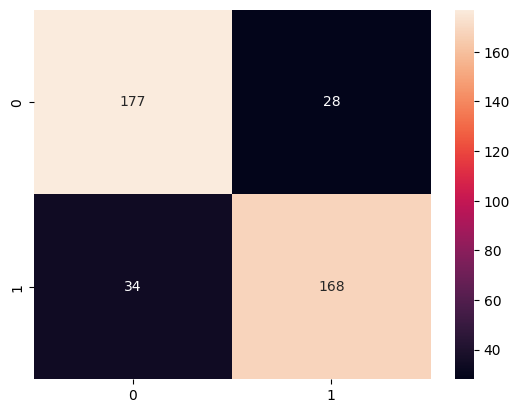

In [78]:
import seaborn as sns

sns.heatmap(conf_matrix,annot=True,fmt='g',)

**Congratulations!**

You completed 75% of your project. Now it's time to build the PowerBI dashboard to show your findings.